# Traditional Value - Dividend Yield

In this notebook, we will focus on the "traditional value" metrics described in the Lo/Patel whitepaper.

[Reference](https://www.quantopian.com/lectures/case-study-traditional-value-factor)

## Dividend Yield

Dividend yield is calculated as:

$$\text{Dividend Yield} = \frac{\text{Dividends}}{\text{Price}}$$

Dividends have been studied extensively in finance literature. A company that pays dividends in essence is sending a signal that they are making a profit and management is confident that it will continue to do so in the forseeable future. 

In this notebook, we will create a Dividend Yield factor using the Pipeline API framework and Morningstar's list of fundamental values.

In [1]:
from quantopian.pipeline import Pipeline
from quantopian.research import run_pipeline
from quantopian.pipeline.factors import CustomFactor
from quantopian.pipeline.data import morningstar
from quantopian.pipeline.filters.morningstar import Q1500US

In [2]:
# Custom Factor 1 : Dividend Yield
class Div_Yield(CustomFactor):

    inputs = [morningstar.valuation_ratios.dividend_yield]
    window_length = 1

    def compute(self, today, assets, out, d_y):
        out[:] = d_y[-1]

def make_pipeline():
    
    pipe = Pipeline(
        columns={
            'div_yield': Div_Yield(),
        },
        screen=Q1500US()

    )

    return pipe

In [3]:
result = run_pipeline(make_pipeline(), start_date='2013-12-01', end_date='2014-12-01')

In [4]:
result.head()

div_yield
2013-12-02 00:00:00+00:00 Equity(2 [ARNC])      0.0125
                          Equity(24 [AAPL])     0.0212
                          Equity(41 [ARCB])     0.0037
                          Equity(62 [ABT])      0.0147
                          Equity(67 [ADSK])     0.0004

In [5]:
result.columns

Index([u'div_yield'], dtype='object')

In [6]:
result.mean(level=0)

,div_yield
2013-12-02 00:00:00+00:00,0.025207
2013-12-03 00:00:00+00:00,0.025207
2013-12-04 00:00:00+00:00,0.025207
2013-12-05 00:00:00+00:00,0.025207
2013-12-06 00:00:00+00:00,0.025207
2013-12-09 00:00:00+00:00,0.025208
2013-12-10 00:00:00+00:00,0.025208
2013-12-11 00:00:00+00:00,0.025208
2013-12-12 00:00:00+00:00,0.025208
2013-12-13 00:00:00+00:00,0.025208


In [7]:
tmp = result.copy()

In [8]:
tmp = tmp.reset_index()
tmp.head()

,level_0,level_1,div_yield
0,2013-12-02 00:00:00+00:00,Equity(2 [ARNC]),0.0125
1,2013-12-02 00:00:00+00:00,Equity(24 [AAPL]),0.0212
2,2013-12-02 00:00:00+00:00,Equity(41 [ARCB]),0.0037
3,2013-12-02 00:00:00+00:00,Equity(62 [ABT]),0.0147
4,2013-12-02 00:00:00+00:00,Equity(67 [ADSK]),0.0004


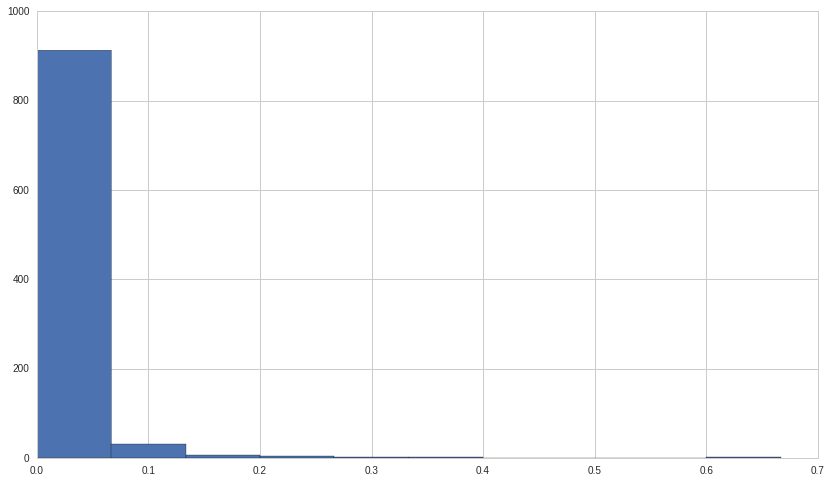

In [9]:
tmp[tmp.level_0 == '2013-12-02']['div_yield'].hist();

In [10]:
res = tmp[tmp.level_0 == '2013-12-02']['div_yield']

In [11]:
res.dropna().describe() * 100

count    95800.000000
mean         2.520699
std          3.572181
min          0.020000
25%          0.982500
50%          1.770000
75%          2.900000
max         66.670000
Name: div_yield, dtype: float64

***

In [12]:
assets = result.index.levels[1].unique()

In [13]:
pricing = get_pricing(assets, start_date='2013-12-01', end_date='2015-02-01', fields='open_price')

In [14]:
import alphalens

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: This function is deprecated and will be removed in the future. Please use the new API instead.
  after removing the cwd from sys.path.


Quantiles Statistics


,min,max,mean,std,count,count %
factor_quantile,,,,,,
1,0.0002,0.0062,0.002792,0.001426,24090,10.088616
2,0.0046,0.0104,0.007252,0.001226,24089,10.088197
3,0.0086,0.0137,0.010635,0.001050,24003,10.052181
4,0.0117,0.0167,0.013643,0.000913,23673,9.913981
5,0.0145,0.0201,0.016535,0.001003,24051,10.072283
6,0.0173,0.0242,0.019746,0.001225,23623,9.893041
7,0.0206,0.0293,0.024012,0.001482,23720,9.933664
8,0.0256,0.0353,0.029257,0.001862,23798,9.966329
9,0.0310,0.0474,0.037892,0.003586,23848,9.987269


Returns Analysis


,5,10,20
Ann. alpha,0.044,0.032,0.022
beta,-0.144,-0.105,-0.045
Mean Period Wise Return Top Quantile (bps),10.128,18.065,32.605
Mean Period Wise Return Bottom Quantile (bps),-1.247,-4.265,-19.543
Mean Period Wise Spread (bps),2.258,2.229,2.605


/usr/local/lib/python2.7/dist-packages/alphalens/plotting.py:727: FutureWarning: pd.rolling_apply is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(center=False,min_periods=1,window=5).apply(args=<tuple>,func=<function>,kwargs=<dict>)
  min_periods=1, args=(period,))
/usr/local/lib/python2.7/dist-packages/alphalens/plotting.py:767: FutureWarning: pd.rolling_apply is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(center=False,min_periods=1,window=5).apply(args=<tuple>,func=<function>,kwargs=<dict>)
  min_periods=1, args=(period,))
/usr/local/lib/python2.7/dist-packages/alphalens/plotting.py:727: FutureWarning: pd.rolling_apply is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(center=False,min_periods=1,window=10).apply(args=<tuple>,func=<function>,kwargs=<dict>)
  min_periods=1, args=(period,))
/usr/local/lib/python2.7/dist-packages/alphalens/pl

Information Analysis


,5,10,20
IC Mean,0.010,0.014,0.028
IC Std.,0.147,0.140,0.143
t-stat(IC),1.112,1.626,3.069
p-value(IC),0.267,0.105,0.002
IC Skew,0.503,0.462,0.178
IC Kurtosis,-0.252,-0.482,-0.589
Ann. IR,1.112,1.626,3.069


/usr/local/lib/python2.7/dist-packages/alphalens/plotting.py:215: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=22,center=False).mean()
  pd.rolling_mean(ic, 22).plot(ax=a,


Turnover Analysis


,5,10,20
Quantile 1 Mean Turnover,0.021,0.036,0.067
Quantile 2 Mean Turnover,0.050,0.083,0.148
Quantile 3 Mean Turnover,0.073,0.122,0.209
Quantile 4 Mean Turnover,0.085,0.141,0.238
Quantile 5 Mean Turnover,0.098,0.162,0.275
Quantile 6 Mean Turnover,0.093,0.151,0.257
Quantile 7 Mean Turnover,0.080,0.131,0.223
Quantile 8 Mean Turnover,0.073,0.120,0.199
Quantile 9 Mean Turnover,0.057,0.094,0.153
Quantile 10 Mean Turnover,0.026,0.042,0.072


,5,10,20
Mean Factor Rank Autocorrelation,0.998,0.996,0.993


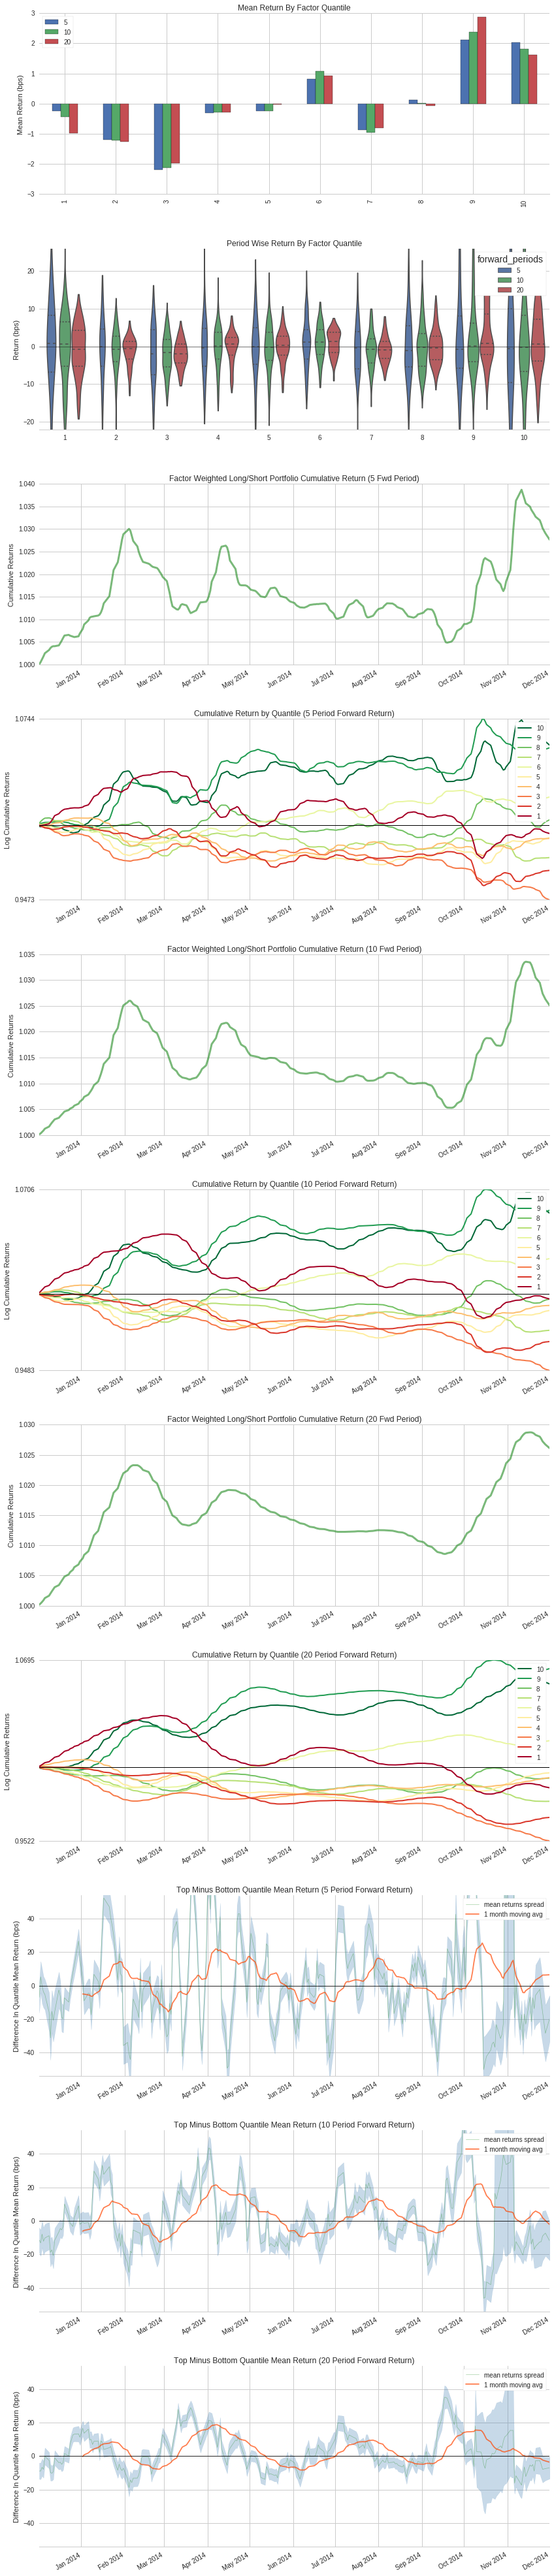

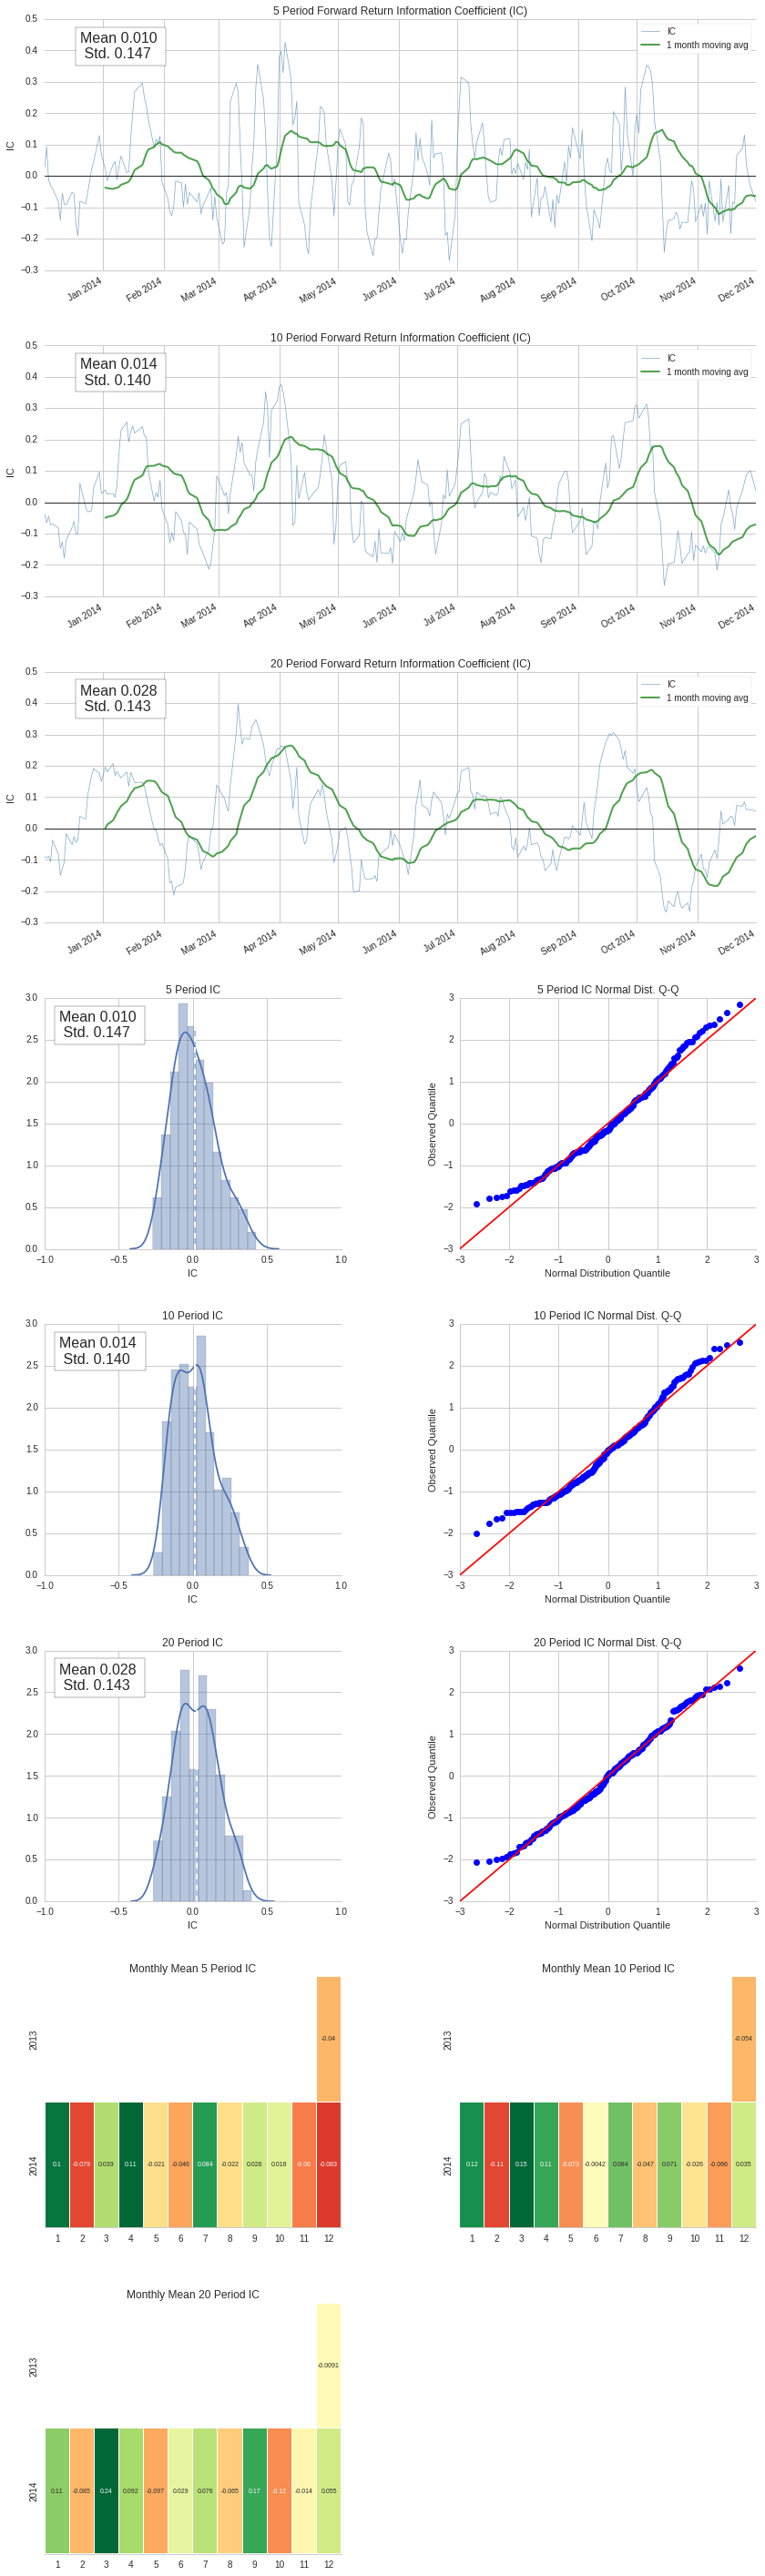

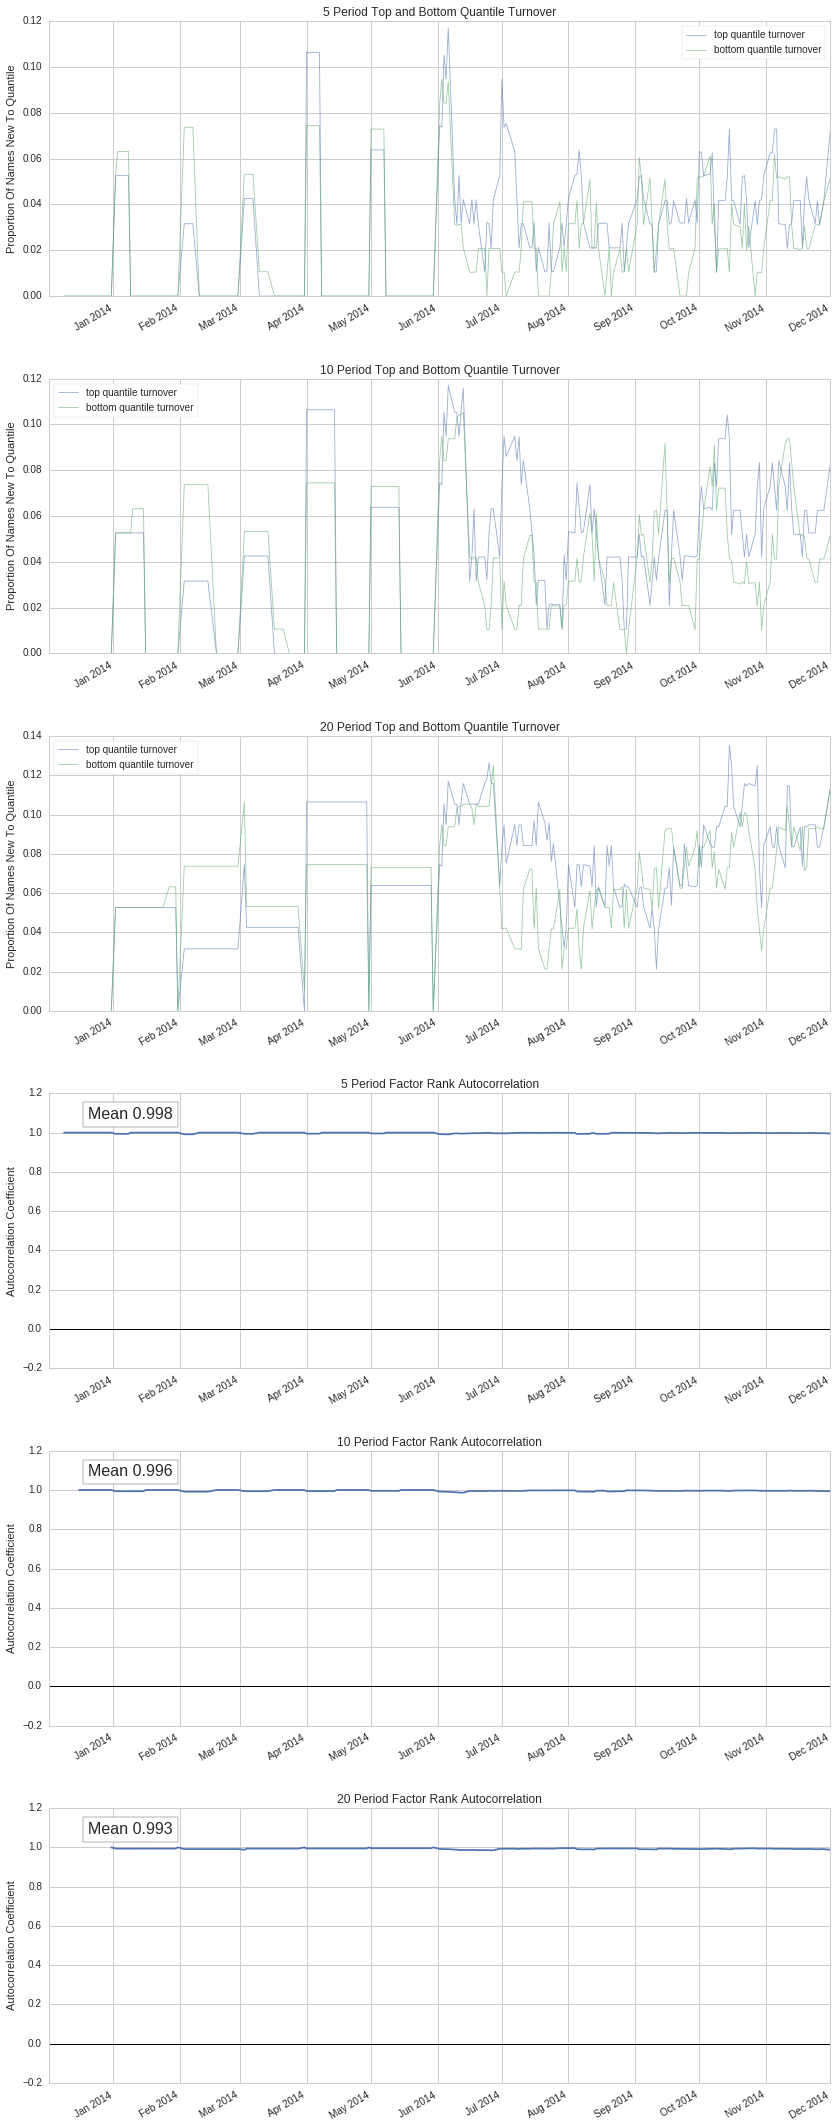

In [15]:
alphalens.tears.create_factor_tear_sheet(factor=result['div_yield'],
                                         prices=pricing,
                                         quantiles=10,
                                         periods=(5,10,20))

***